In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/Churn_Modelling.csv


In [4]:
df = pd.read_csv('/kaggle/input/Churn_Modelling.csv')

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.duplicated().sum()

0

In [8]:
df.drop(columns = ['RowNumber', 'CustomerId', 'Surname'], inplace = True)

In [9]:
df = pd.get_dummies(df, columns = ['Geography', 'Gender'], drop_first = True)

In [10]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [11]:
df.shape

(10000, 12)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [13]:
X = df.drop(columns = ['Exited'])
y = df['Exited'].values

In [14]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [15]:
print(f"X shape : {X.shape}")
print(f"y shape : {y.shape}")


X shape : (10000, 11)
y shape : (10000,)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state= 42)


In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.optimizers import Adam


In [33]:
model = Sequential([
    Input(shape=(11,)),  # 11 input features
    Dense(units=22, activation='relu'),  # More neurons in the first hidden layer
    Dropout(rate=0.3),  # Dropout for regularization
    Dense(units=11, activation='relu'),  # Second hidden layer
    Dropout(rate=0.3),  # Dropout again
    Dense(units=1, activation='sigmoid')  # Output layer (Binary Classification)
])

In [34]:
model.layers

[<Dense name=dense_3, built=True>,
 <Dropout name=dropout_2, built=True>,
 <Dense name=dense_4, built=True>,
 <Dropout name=dropout_3, built=True>,
 <Dense name=dense_5, built=True>]

In [35]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 22)                  │             264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 22)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 11)                  │             253 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 11)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 529 (2.07 KB)

 Trainable params: 529 (2.07 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [40]:
print(X_train_scaled.shape)
print(y_train.shape)

(8000, 11)
(8000,)


In [41]:
history = model.fit(
    X_train_scaled, y_train, 
    epochs=100,
    batch_size=64,  # Faster training
    validation_split=0.2,
    #callbacks=callbacks,  # Early stopping & LR reduction
    verbose=2  # Cleaner output
)


Epoch 1/100
100/100 - 1s - 14ms/step - accuracy: 0.7689 - loss: 0.5639 - val_accuracy: 0.7987 - val_loss: 0.4898
Epoch 2/100
100/100 - 0s - 2ms/step - accuracy: 0.7909 - loss: 0.5066 - val_accuracy: 0.7987 - val_loss: 0.4590
Epoch 3/100
100/100 - 0s - 2ms/step - accuracy: 0.7928 - loss: 0.4915 - val_accuracy: 0.7987 - val_loss: 0.4456
Epoch 4/100
100/100 - 0s - 2ms/step - accuracy: 0.7944 - loss: 0.4748 - val_accuracy: 0.7987 - val_loss: 0.4357
Epoch 5/100
100/100 - 0s - 2ms/step - accuracy: 0.7944 - loss: 0.4646 - val_accuracy: 0.7987 - val_loss: 0.4297
Epoch 6/100
100/100 - 0s - 2ms/step - accuracy: 0.7952 - loss: 0.4627 - val_accuracy: 0.8006 - val_loss: 0.4253
Epoch 7/100
100/100 - 0s - 2ms/step - accuracy: 0.7981 - loss: 0.4527 - val_accuracy: 0.8044 - val_loss: 0.4209
Epoch 8/100
100/100 - 0s - 2ms/step - accuracy: 0.8000 - loss: 0.4528 - val_accuracy: 0.8050 - val_loss: 0.4184
Epoch 9/100
100/100 - 0s - 2ms/step - accuracy: 0.8028 - loss: 0.4465 - val_accuracy: 0.8081 - val_loss

In [42]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [43]:
history.params

{'verbose': 2, 'epochs': 100, 'steps': 100}

In [44]:
X_test_scaled.shape

(2000, 11)

In [45]:
y_pred = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [88]:
# y_2 = model.predict(X_test_scaled[100:400,:])

In [46]:
y_pred = np.where(y_pred > 0.5, 1, 0)

In [47]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

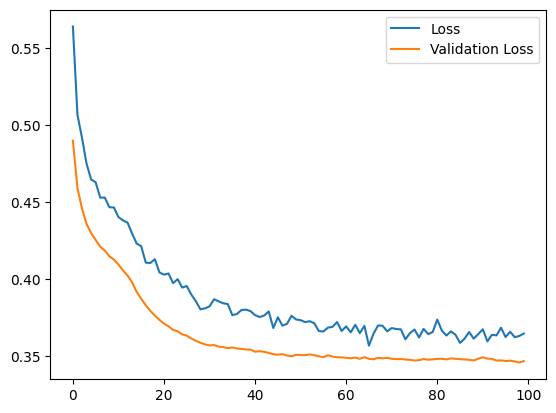

In [48]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label = 'Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.legend()
plt.show()

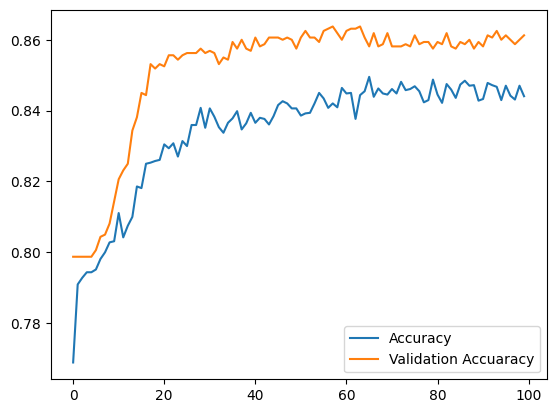

In [49]:
plt.plot(history.history['accuracy'], label = 'Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuaracy')
plt.legend()
plt.show()